# *California Housing Price Prediction - Project for Submission*

In [40]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')




## 1. Load the data 

### Read the “Housing.csv” file from the folder into the program.

In [41]:
#Importing dataset
dataset = pd.read_csv('housing.csv')

In [42]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Print first few rows of this data.  

In [43]:
#Checking Headers
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [44]:
#Checking NuN values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Extract input (X) and output (y) data from the dataset.

In [45]:
#Defining X (features) and Y(lable) 
X = dataset.drop('median_house_value', axis= 1)
y = dataset.median_house_value

## 2. Handle missing values 

In [46]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [47]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [48]:
#Checking X shape
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

### Fill the missing values with “mean” of the respective column. 

In [49]:
#Dealing with NaN values in the dataset
from sklearn.preprocessing import Imputer
impute = Imputer(missing_values='NaN',strategy ='mean', axis = 0)
X[["total_bedrooms"]]  = impute.fit_transform(X[["total_bedrooms"]])

## 3. Encode categorical data 

In [50]:
X.shape

(20640, 9)

In [51]:
X[["ocean_proximity"]].head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [52]:
X["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Convert categorical column in the dataset to numerical data. 

In [53]:
#Lable encoding the categorical data i.e. column ocean_proximity
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
X[["ocean_proximity"]] = encode.fit_transform(X[["ocean_proximity"]])

In [54]:
X["ocean_proximity"].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [55]:
from sklearn.preprocessing import OneHotEncoder
onehe = OneHotEncoder(categorical_features=[8])
X = onehe.fit_transform(X).toarray()

In [56]:
X[:5]

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        -1.2223e+02,  3.7880e+01,  4.1000e+01,  8.8000e+02,  1.2900e+02,
         3.2200e+02,  1.2600e+02,  8.3252e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        -1.2222e+02,  3.7860e+01,  2.1000e+01,  7.0990e+03,  1.1060e+03,
         2.4010e+03,  1.1380e+03,  8.3014e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        -1.2224e+02,  3.7850e+01,  5.2000e+01,  1.4670e+03,  1.9000e+02,
         4.9600e+02,  1.7700e+02,  7.2574e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        -1.2225e+02,  3.7850e+01,  5.2000e+01,  1.2740e+03,  2.3500e+02,
         5.5800e+02,  2.1900e+02,  5.6431e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        -1.2225e+02,  3.7850e+01,  5.2000e+01,  1.6270e+03,  2.8000e+02,
         5.6500e+02,  2.5900e+02,  3.8462e+00]])

In [57]:
#Re-checking the X shape
X.shape

(20640, 13)

## 4. Split the dataset. Split the data into 80% training dataset and 20% test dataset. 

In [58]:
#Creating Train test data
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state =0)

## 5. Standardize data. Standardize training and test datasets. 

In [59]:
#Standardizing X_final and X_test

from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [60]:
X_train.shape


(16512, 13)

In [61]:
X_test.shape


(4128, 13)

In [62]:
y_train.shape


(16512,)

In [63]:
y_test.shape

(4128,)

## Model 1- Linear Regression 

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

reg_model1 = LinearRegression()
reg_model1.fit(X_train,y_train)
y_pred=reg_model1.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,y_pred)))


4336806310956543.0


# Model 2 - Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
dec_model2=DecisionTreeRegressor()
dec_model2.fit(X_train,y_train)

y_pred_dec_tree=dec_model2.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_dec_tree)))

76282.43163758691


# Model 3 - Random Forest Regression Model

In [66]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model3 = RandomForestRegressor()

random_forest_model3.fit(X_train,y_train)

y_pred_random_forest=random_forest_model3.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_random_forest)))


60192.074389950554


In [67]:
print("RMSE from Linear Regression:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE from Decision Tree:",np.sqrt(mean_squared_error(y_test,y_pred_dec_tree)))
print("RMSE from Random Forest Regression Model:",np.sqrt(mean_squared_error(y_test,y_pred_random_forest)))

RMSE from Linear Regression: 4336806310956543.0
RMSE from Decision Tree: 76282.43163758691
RMSE from Random Forest Regression Model: 60192.074389950554


## Bonus exercise: Perform Linear Regression with one independent variable :

In [68]:
X =dataset[['median_income']]
X.shape

(20640, 1)

In [69]:
from sklearn.cross_validation import train_test_split 
X_train_bonus, X_test_bonus, y_train_bonus, y_test_bonus = train_test_split(X,y,test_size = .2, random_state =0)

In [70]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
X_train_bonus = sc.fit_transform(X_train_bonus)
X_test_bonus = sc.fit_transform(X_test_bonus)

In [71]:
bonus_reg_model = LinearRegression()
bonus_reg_model.fit(X_train_bonus,y_train_bonus)
y_pred_bonus=bonus_reg_model.predict(X_test_bonus)

print(np.sqrt(mean_squared_error(y_test_bonus,y_pred_bonus)))

85013.25691392619


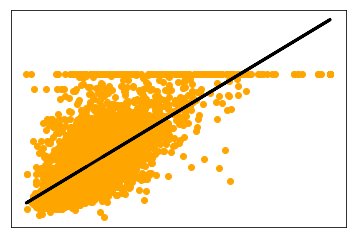

In [72]:
# Plot outputs
plt.scatter(X_test_bonus, y_test_bonus,  color='orange')
plt.plot(X_test_bonus, y_pred_bonus, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()